Enter xmin (press Enter for 0.0):  -10
Enter xmax (press Enter for 9.4):  19.4
Enter ymin (press Enter for -20):  -30
Enter ymax (press Enter for 50):  60
Label each data point with its intensity value? (y/n):  y


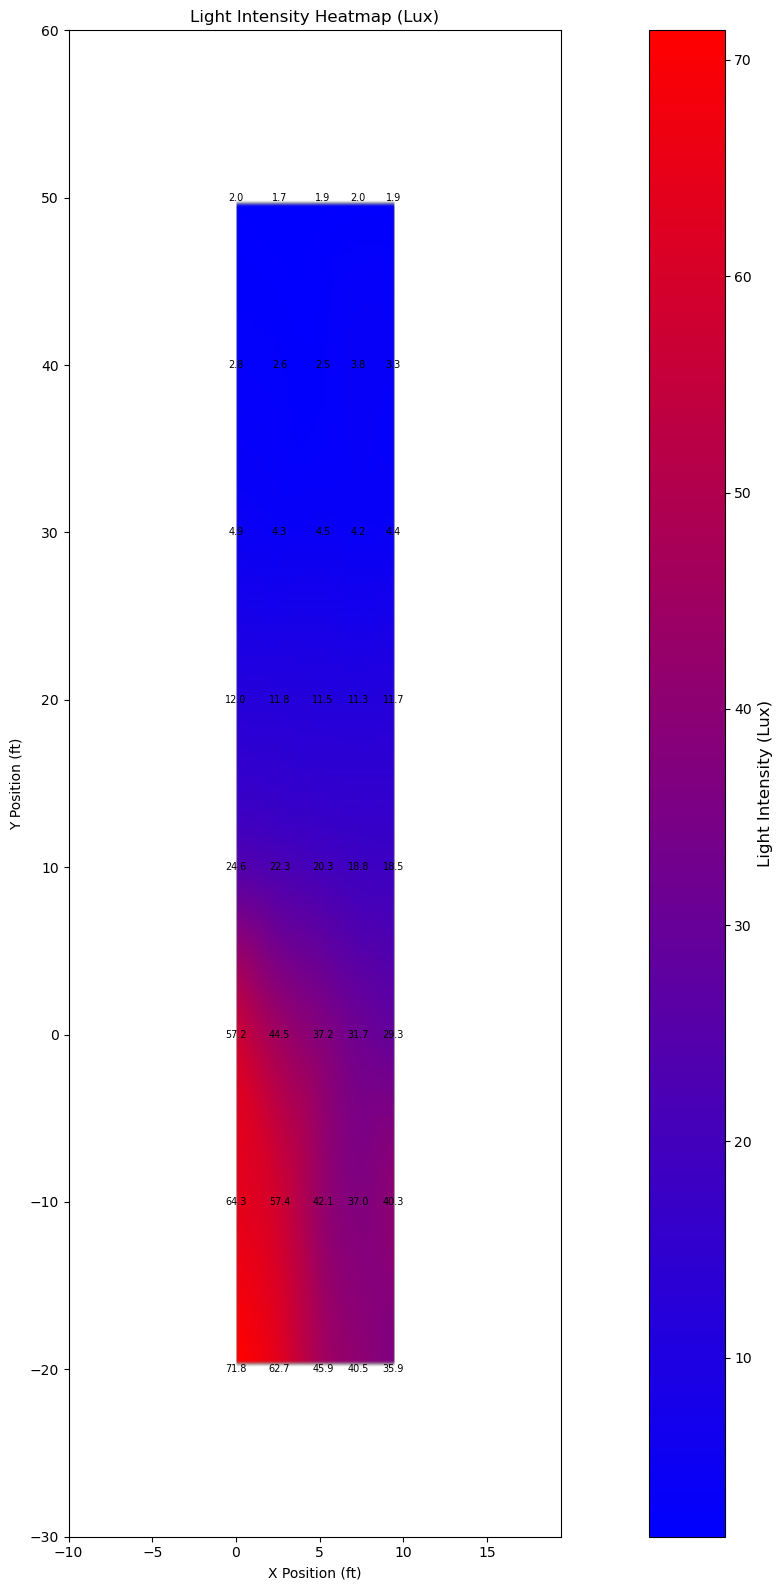

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap

# Load CSV
df = pd.read_csv("xyz.csv")

# Extract columns by position
x = df.iloc[:, 0].values   # first column
y = df.iloc[:, 1].values   # second column
z = df.iloc[:, 2].values   # third column (intensity in Lux)

# --- User Input for Plot Bounds ---
def get_bound(prompt_text, default_value):
    user_input = input(f"{prompt_text} (press Enter for {default_value}): ")
    return float(user_input) if user_input.strip() else default_value

xmin = get_bound("Enter xmin", x.min())
xmax = get_bound("Enter xmax", x.max())
ymin = get_bound("Enter ymin", y.min())
ymax = get_bound("Enter ymax", y.max())

# --- Ask user if they want point labels ---
label_choice = input("Label each data point with its intensity value? (y/n): ").strip().lower()
label_points = (label_choice == "y")

# Create grid for heatmap
grid_x, grid_y = np.mgrid[
    xmin:xmax:200j,
    ymin:ymax:200j
]

# Interpolate intensity values onto grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Custom blue → red colormap (no green)
colors = ["blue", "purple", "red"]
cmap = LinearSegmentedColormap.from_list("blue_red_only", colors)

# Plot heatmap
plt.figure(figsize=(18, 16))
plt.imshow(
    grid_z.T,
    extent=(xmin, xmax, ymin, ymax),
    origin='lower',
    cmap=cmap
)

# Colorbar labeled in Lux
cbar = plt.colorbar()
cbar.set_label("Light Intensity (Lux)", fontsize=12)

plt.xlabel("X Position (ft)")
plt.ylabel("Y Position (ft)")
plt.title("Light Intensity Heatmap (Lux)")

# --- Optional black text labels (no dots) ---
if label_points:
    for xi, yi, zi in zip(x, y, z):
        plt.text(
            xi, yi,
            f"{zi:.1f}",
            color="black",
            fontsize=7,
            ha="center",
            va="center"
        )

plt.tight_layout()
plt.show()